In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

#b1 = np.sqrt(2)*np.dot(R,a1);  b2 = a2#np.sqrt(2)*np.dot(R,a2); #a2
b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];
B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

In [3]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        
        f =  (1/detTAa)**(1/10)+ tB_con**2 + (det(tA)*det(tA))**4
        
        
        
        return f 

In [4]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': 0
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,0,0,1]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [5]:
epochs= 30
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:36853629933337.664|value:2943724563542.9434
temp:4|epoch:5|change:2572241282024.3896|value:1570639933286.0056
temp:4|epoch:10|change:8.402489225711269e+17|value:1570639933286.0056
temp:4|epoch:15|change:20387330318747.69|value:1570639933286.0056
temp:4|epoch:20|change:50880244010136.64|value:968517867615.5005
temp:4|epoch:25|change:23966134812630.074|value:968517867615.5005
temp:0.0975609756097561|epoch:0|change:1.000048172654151e+16|value:486785561340.0632
temp:0.0975609756097561|epoch:5|change:4327532502939647.5|value:486785561340.0632
temp:0.0975609756097561|epoch:10|change:2.3019837257393933e+17|value:486785561340.0632
temp:0.0975609756097561|epoch:15|change:656556550105791.2|value:486785561340.0632
temp:0.0975609756097561|epoch:20|change:78460876331095.16|value:486785561340.0632
temp:0.0975609756097561|epoch:25|change:591801855650.2849|value:486785561340.0632
temp:0.04938271604938272|epoch:0|change:1.102024727762566e+18|value:486785561340.0632
temp:0.04938271

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_90628/1538598235.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  f =  (1/detTAa)**(1/10)+ tB_con**2 + (det(tA)*det(tA))**4


temp:0.03305785123966942|epoch:10|change:600533705730589.9|value:486785561340.0632
temp:0.03305785123966942|epoch:15|change:9.217887383991e+16|value:486785561340.0632
temp:0.03305785123966942|epoch:20|change:806844959716154.2|value:486785561340.0632
temp:0.03305785123966942|epoch:25|change:14743515379169.346|value:486785561340.0632
temp:0.02484472049689441|epoch:0|change:167721225235276.8|value:486785561340.0632
temp:0.02484472049689441|epoch:5|change:305779419749341.3|value:486785561340.0632
temp:0.02484472049689441|epoch:10|change:20892403365886.547|value:486785561340.0632
temp:0.02484472049689441|epoch:15|change:32205534416699.41|value:486785561340.0632
temp:0.02484472049689441|epoch:20|change:1.851287326089366e+16|value:486785561340.0632
temp:0.02484472049689441|epoch:25|change:56649936266843.62|value:486785561340.0632
temp:0.01990049751243781|epoch:0|change:1.8516920982198004e+16|value:486785561340.0632
temp:0.01990049751243781|epoch:5|change:10803061906751.602|value:486785561340.

temp:0.004756242568370987|epoch:0|change:325442291518785.94|value:356036161160.6492
temp:0.004756242568370987|epoch:5|change:1014876260355888.5|value:356036161160.6492
temp:0.004756242568370987|epoch:10|change:1.8488670475912202e+17|value:356036161160.6492
temp:0.004756242568370987|epoch:15|change:2.0906345438759035e+18|value:356036161160.6492
temp:0.004756242568370987|epoch:20|change:2.476045326166699e+16|value:356036161160.6492
temp:0.004756242568370987|epoch:25|change:5.4939268836667744e+17|value:356036161160.6492
temp:0.004540295119182747|epoch:0|change:222352977563304.5|value:356036161160.6492
temp:0.004540295119182747|epoch:5|change:5.590255587402305e+16|value:356036161160.6492
temp:0.004540295119182747|epoch:10|change:8130882984704.812|value:356036161160.6492
temp:0.004540295119182747|epoch:15|change:6097294569362337.0|value:356036161160.6492
temp:0.004540295119182747|epoch:20|change:26923163902890.605|value:356036161160.6492
temp:0.004540295119182747|epoch:25|change:6.354661548

temp:0.00249843847595253|epoch:0|change:2.0906454904859e+18|value:356036161160.6492
temp:0.00249843847595253|epoch:5|change:5137864594639254.0|value:356036161160.6492
temp:0.00249843847595253|epoch:10|change:1374651837739905.0|value:356036161160.6492
temp:0.00249843847595253|epoch:15|change:39802063519867.75|value:356036161160.6492
temp:0.00249843847595253|epoch:20|change:9462275305607.717|value:356036161160.6492
temp:0.00249843847595253|epoch:25|change:6702933223388.711|value:356036161160.6492
temp:0.0024375380865326026|epoch:0|change:68089778217147.414|value:356036161160.6492
temp:0.0024375380865326026|epoch:5|change:9236959411616454.0|value:356036161160.6492
temp:0.0024375380865326026|epoch:10|change:1.8467705379361585e+18|value:356036161160.6492
temp:0.0024375380865326026|epoch:15|change:2.3069302931302044e+16|value:159817455743.25824
temp:0.0024375380865326026|epoch:20|change:1376342401525782.0|value:159817455743.25824
temp:0.0024375380865326026|epoch:25|change:1.7190568341925024e

temp:0.0017233950883239987|epoch:15|change:3.061001480016335e+16|value:159817455743.25824
temp:0.0017233950883239987|epoch:20|change:5.239126542834214e+16|value:159817455743.25824
temp:0.0017233950883239987|epoch:25|change:1.3935748148997058e+17|value:159817455743.25824
temp:0.0016941973739940707|epoch:0|change:4742797181056157.0|value:159817455743.25824
temp:0.0016941973739940707|epoch:5|change:82492371316201.97|value:159817455743.25824
temp:0.0016941973739940707|epoch:10|change:7.205785401668064e+16|value:159817455743.25824
temp:0.0016941973739940707|epoch:15|change:1.719221533383078e+16|value:159817455743.25824
temp:0.0016941973739940707|epoch:20|change:138581018209095.61|value:159817455743.25824
temp:0.0016941973739940707|epoch:25|change:1.7200793757045998e+16|value:159817455743.25824
temp:0.0016659725114535613|epoch:0|change:10230580926518.896|value:159817455743.25824
temp:0.0016659725114535613|epoch:5|change:10826124696590.96|value:159817455743.25824
temp:0.0016659725114535613|ep

temp:0.0013153567905294311|epoch:25|change:12163528049862.127|value:137040734126.60776
temp:0.0012982797792924375|epoch:0|change:206408911866977.97|value:137040734126.60776
temp:0.0012982797792924375|epoch:5|change:338939225518.51404|value:137040734126.60776
temp:0.0012982797792924375|epoch:10|change:10109264762568.057|value:137040734126.60776
temp:0.0012982797792924375|epoch:15|change:2741545111365238.0|value:137040734126.60776
temp:0.0012982797792924375|epoch:20|change:17503470702504.932|value:137040734126.60776
temp:0.0012982797792924375|epoch:25|change:35134390889341.203|value:137040734126.60776
temp:0.001281640499839795|epoch:0|change:38192277815611.84|value:137040734126.60776
temp:0.001281640499839795|epoch:5|change:97451924223304.23|value:137040734126.60776
temp:0.001281640499839795|epoch:10|change:1380958977134047.5|value:137040734126.60776
temp:0.001281640499839795|epoch:15|change:19584023201640.453|value:137040734126.60776
temp:0.001281640499839795|epoch:20|change:19751677702

temp:0.0010523546435148641|epoch:0|change:15686985864934.412|value:137040734126.60776
temp:0.0010523546435148641|epoch:5|change:5571347845926.758|value:137040734126.60776
temp:0.0010523546435148641|epoch:10|change:5.899621787858136e+18|value:137040734126.60776
temp:0.0010523546435148641|epoch:15|change:6727035311041.528|value:137040734126.60776
temp:0.0010523546435148641|epoch:20|change:8980245123165.736|value:137040734126.60776
temp:0.0010523546435148641|epoch:25|change:13933581548216.818|value:137040734126.60776
temp:0.0010413954699297053|epoch:0|change:21105352690006.312|value:137040734126.60776
temp:0.0010413954699297053|epoch:5|change:9863339899593.172|value:137040734126.60776
temp:0.0010413954699297053|epoch:10|change:6615378484177.669|value:137040734126.60776
temp:0.0010413954699297053|epoch:15|change:1.2669274868760264e+16|value:137040734126.60776
temp:0.0010413954699297053|epoch:20|change:8828809676896.797|value:137040734126.60776
temp:0.0010413954699297053|epoch:25|change:9.2

temp:0.0008770006577504927|epoch:10|change:13490327060139.268|value:87527663937.48793
temp:0.0008770006577504927|epoch:15|change:198135922036749.84|value:87527663937.48793
temp:0.0008770006577504927|epoch:20|change:8.023634598565641e+17|value:87527663937.48793
temp:0.0008770006577504927|epoch:25|change:2.7031916552519968e+17|value:87527663937.48793
temp:0.0008693762225603123|epoch:0|change:1409030216494.6287|value:87527663937.48793
temp:0.0008693762225603123|epoch:5|change:1.8534257916507908e+16|value:87527663937.48793
temp:0.0008693762225603123|epoch:10|change:727331223606770.5|value:87527663937.48793
temp:0.0008693762225603123|epoch:15|change:129132265234326.67|value:87527663937.48793
temp:0.0008693762225603123|epoch:20|change:16003062505675.004|value:87527663937.48793
temp:0.0008693762225603123|epoch:25|change:1008195137516006.4|value:87527663937.48793
temp:0.0008618832148243906|epoch:0|change:39053896873201.24|value:87527663937.48793
temp:0.0008618832148243906|epoch:5|change:294294

temp:0.0007574323044877859|epoch:25|change:298371860483349.2|value:87527663937.48793
temp:0.000751738395038526|epoch:0|change:72243931705201.36|value:87527663937.48793
temp:0.000751738395038526|epoch:5|change:1494126465123.3767|value:87527663937.48793
temp:0.000751738395038526|epoch:10|change:14805987813421.906|value:87527663937.48793
temp:0.000751738395038526|epoch:15|change:inf|value:87527663937.48793
temp:0.000751738395038526|epoch:20|change:20991575586906.82|value:87527663937.48793
temp:0.000751738395038526|epoch:25|change:70689639758720.73|value:87527663937.48793
temp:0.0007461294534601748|epoch:0|change:38162848583533.086|value:87527663937.48793
temp:0.0007461294534601748|epoch:5|change:9966450182128.912|value:87527663937.48793
temp:0.0007461294534601748|epoch:10|change:1687371574026290.0|value:87527663937.48793
temp:0.0007461294534601748|epoch:15|change:23997623918045.387|value:87527663937.48793
temp:0.0007461294534601748|epoch:20|change:2.4769599497592816e+16|value:87527663937.

temp:0.0006577865482650873|epoch:5|change:723454261733457.0|value:87527663937.48793
temp:0.0006577865482650873|epoch:10|change:17139239761778.074|value:87527663937.48793
temp:0.0006577865482650873|epoch:15|change:192917413689054.16|value:87527663937.48793
temp:0.0006577865482650873|epoch:20|change:2519958820037.6704|value:87527663937.48793
temp:0.0006577865482650873|epoch:25|change:6112622000412872.0|value:87527663937.48793
temp:0.0006534879921581434|epoch:0|change:7230792673611024.0|value:87527663937.48793
temp:0.0006534879921581434|epoch:5|change:15705375317574.457|value:87527663937.48793
temp:0.0006534879921581434|epoch:10|change:7244196505981.385|value:87527663937.48793
temp:0.0006534879921581434|epoch:15|change:2.2684934130619497e+18|value:87527663937.48793
temp:0.0006534879921581434|epoch:20|change:2499260474462054.5|value:87527663937.48793
temp:0.0006534879921581434|epoch:25|change:24453679358716.676|value:87527663937.48793
temp:0.0006492452523940912|epoch:0|change:2316951411465

temp:0.0005916284573287973|epoch:25|change:3002741199956920.0|value:87527663937.48793
temp:0.0005881488016468163|epoch:0|change:2260310369415601.0|value:87527663937.48793
temp:0.0005881488016468163|epoch:5|change:630175035217.2141|value:87527663937.48793
temp:0.0005881488016468163|epoch:10|change:8308490130145.04|value:87527663937.48793
temp:0.0005881488016468163|epoch:15|change:1118612769178690.2|value:87527663937.48793
temp:0.0005881488016468163|epoch:20|change:2053763810734335.8|value:87527663937.48793
temp:0.0005881488016468163|epoch:25|change:399257897402.57526|value:87527663937.48793
temp:0.0005847098377430197|epoch:0|change:2943495547234.1562|value:87527663937.48793
temp:0.0005847098377430197|epoch:5|change:6558174568977.987|value:87527663937.48793
temp:0.0005847098377430197|epoch:10|change:4.295026739717596e+17|value:87527663937.48793
temp:0.0005847098377430197|epoch:15|change:6073170159046.209|value:87527663937.48793
temp:0.0005847098377430197|epoch:20|change:13619449672756.04

temp:0.0005318441696582899|epoch:20|change:6.352997137305277e+16|value:87527663937.48793
temp:0.0005318441696582899|epoch:25|change:12301788385209.055|value:87527663937.48793
temp:0.0005290305515143498|epoch:0|change:6638277108252471.0|value:87527663937.48793
temp:0.0005290305515143498|epoch:5|change:1854212537912027.8|value:87527663937.48793
temp:0.0005290305515143498|epoch:10|change:196712384517991.7|value:87527663937.48793
temp:0.0005290305515143498|epoch:15|change:12500890746539.393|value:87527663937.48793
temp:0.0005290305515143498|epoch:20|change:9003611898483.977|value:87527663937.48793
temp:0.0005290305515143498|epoch:25|change:16595679615229.418|value:87527663937.48793
temp:0.0005262465465070385|epoch:0|change:1.0077673544784531e+18|value:87527663937.48793
temp:0.0005262465465070385|epoch:5|change:6642079294087176.0|value:87527663937.48793
temp:0.0005262465465070385|epoch:10|change:15125957543835.24|value:87527663937.48793
temp:0.0005262465465070385|epoch:15|change:72164436294

temp:0.0004830334500664171|epoch:5|change:61594575933136.875|value:67558209409.263115
temp:0.0004830334500664171|epoch:10|change:17310587630994.467|value:67558209409.263115
temp:0.0004830334500664171|epoch:15|change:201376895504080.62|value:67558209409.263115
temp:0.0004830334500664171|epoch:20|change:4077671537645.0806|value:67558209409.263115
temp:0.0004830334500664171|epoch:25|change:29918295006461.605|value:67558209409.263115
temp:0.00048071145295036654|epoch:0|change:29198885178799.043|value:67558209409.263115
temp:0.00048071145295036654|epoch:5|change:1011029207581.085|value:67558209409.263115
temp:0.00048071145295036654|epoch:10|change:1.1703963028702275e+17|value:67558209409.263115
temp:0.00048071145295036654|epoch:15|change:6724265380943.883|value:67558209409.263115
temp:0.00048071145295036654|epoch:20|change:48535479853368.26|value:67558209409.263115
temp:0.00048071145295036654|epoch:25|change:34653582238909.133|value:67558209409.263115
temp:0.00047841167324482717|epoch:0|cha

temp:0.0004443950672147543|epoch:25|change:56279273842487.66|value:67558209409.263115
temp:0.0004424289348523397|epoch:0|change:56240530918937.25|value:67558209409.263115
temp:0.0004424289348523397|epoch:5|change:2636170393023.759|value:67558209409.263115
temp:0.0004424289348523397|epoch:10|change:28507141799086.367|value:67558209409.263115
temp:0.0004424289348523397|epoch:15|change:249910531316074.6|value:67558209409.263115
temp:0.0004424289348523397|epoch:20|change:1249208602149363.5|value:67558209409.263115
temp:0.0004424289348523397|epoch:25|change:97997732562652.98|value:67558209409.263115
temp:0.00044048012333443493|epoch:0|change:2261039504441396.5|value:67558209409.263115
temp:0.00044048012333443493|epoch:5|change:50973379224351.234|value:67558209409.263115
temp:0.00044048012333443493|epoch:10|change:2090541254878237.5|value:67558209409.263115
temp:0.00044048012333443493|epoch:15|change:21459350866265.6|value:67558209409.263115
temp:0.00044048012333443493|epoch:20|change:328333

temp:0.0004097940784755663|epoch:10|change:1.994637776097641e+16|value:67558209409.263115
temp:0.0004097940784755663|epoch:15|change:1148777036613648.0|value:67558209409.263115
temp:0.0004097940784755663|epoch:20|change:27141890933791.36|value:67558209409.263115
temp:0.0004097940784755663|epoch:25|change:10118778237126.43|value:67558209409.263115
temp:0.00040812162024283263|epoch:0|change:15042720374276.695|value:67558209409.263115
temp:0.00040812162024283263|epoch:5|change:10265829455650.791|value:67558209409.263115
temp:0.00040812162024283263|epoch:10|change:5.962077409827803e+16|value:67558209409.263115
temp:0.00040812162024283263|epoch:15|change:9.218230646608458e+16|value:67558209409.263115
temp:0.00040812162024283263|epoch:20|change:255908850283397.4|value:67558209409.263115
temp:0.00040812162024283263|epoch:25|change:20120612561391.79|value:67558209409.263115
temp:0.00040646275784981227|epoch:0|change:5.2390423574951336e+16|value:67558209409.263115
temp:0.00040646275784981227|ep

temp:0.00038164297299876003|epoch:20|change:inf|value:67558209409.263115
temp:0.00038164297299876003|epoch:25|change:107464667512191.73|value:67558209409.263115
temp:0.0003801919969584644|epoch:0|change:7473135086736.832|value:67558209409.263115
temp:0.0003801919969584644|epoch:5|change:2.477222159765764e+16|value:67558209409.263115
temp:0.0003801919969584644|epoch:10|change:2.304770527260347e+16|value:67558209409.263115
temp:0.0003801919969584644|epoch:15|change:inf|value:67558209409.263115
temp:0.0003801919969584644|epoch:20|change:5718822522963.694|value:67558209409.263115
temp:0.0003801919969584644|epoch:25|change:38814159236365.14|value:67558209409.263115
temp:0.00037875201212006477|epoch:0|change:62529495336537.27|value:67558209409.263115
temp:0.00037875201212006477|epoch:5|change:1.1721626170600388e+16|value:67558209409.263115
temp:0.00037875201212006477|epoch:10|change:5954097503761.738|value:67558209409.263115
temp:0.00037875201212006477|epoch:15|change:1.653169967637314e+17|v

temp:0.00035584022773774626|epoch:5|change:33440895504081.06|value:67558209409.263115
temp:0.00035584022773774626|epoch:10|change:7234417322672421.0|value:67558209409.263115
temp:0.00035584022773774626|epoch:15|change:inf|value:67558209409.263115
temp:0.00035584022773774626|epoch:20|change:72893244946792.23|value:67558209409.263115
temp:0.00035584022773774626|epoch:25|change:21327423098787.44|value:67558209409.263115
temp:0.00035457849481429005|epoch:0|change:16097029875519.873|value:67558209409.263115
temp:0.00035457849481429005|epoch:5|change:1858738994597593.8|value:67558209409.263115
temp:0.00035457849481429005|epoch:10|change:291892692908554.4|value:67558209409.263115
temp:0.00035457849481429005|epoch:15|change:17785870518070.348|value:67558209409.263115
temp:0.00035457849481429005|epoch:20|change:18548001700938.797|value:67558209409.263115
temp:0.00035457849481429005|epoch:25|change:5945640433810.787|value:67558209409.263115
temp:0.0003533256779436451|epoch:0|change:2288684659531

temp:0.0003344201989800189|epoch:15|change:8157710127636.422|value:67558209409.263115
temp:0.0003344201989800189|epoch:20|change:72446102049052.7|value:67558209409.263115
temp:0.0003344201989800189|epoch:25|change:195437628346160.7|value:67558209409.263115
temp:0.000333305557870178|epoch:0|change:8598773560409.743|value:67558209409.263115
temp:0.000333305557870178|epoch:5|change:15042720374276.695|value:67558209409.263115
temp:0.000333305557870178|epoch:10|change:7360152298902.821|value:67558209409.263115
temp:0.000333305557870178|epoch:15|change:41491636303424.43|value:67558209409.263115
temp:0.000333305557870178|epoch:20|change:23727979592307.062|value:67558209409.263115
temp:0.000333305557870178|epoch:25|change:6686872503278.985|value:67558209409.263115
temp:0.0003321983223984724|epoch:0|change:1693246868881457.5|value:67558209409.263115
temp:0.0003321983223984724|epoch:5|change:28204642314869.297|value:67558209409.263115
temp:0.0003321983223984724|epoch:10|change:129163673838315.53

temp:0.0003144406886251085|epoch:5|change:5.589763483879191e+16|value:67558209409.263115
temp:0.0003144406886251085|epoch:10|change:12056941557767.19|value:67558209409.263115
temp:0.0003144406886251085|epoch:15|change:188712944074523.44|value:67558209409.263115
temp:0.0003144406886251085|epoch:20|change:14193156915413.94|value:67558209409.263115
temp:0.0003144406886251085|epoch:25|change:120478884694347.98|value:67558209409.263115
temp:0.000313455058381005|epoch:0|change:56950034401576.37|value:67558209409.263115
temp:0.000313455058381005|epoch:5|change:3972949768783.314|value:67558209409.263115
temp:0.000313455058381005|epoch:10|change:34341220663751.273|value:67558209409.263115
temp:0.000313455058381005|epoch:15|change:2.660280983733746e+16|value:67558209409.263115
temp:0.000313455058381005|epoch:20|change:6067541293190.576|value:67558209409.263115
temp:0.000313455058381005|epoch:25|change:16097029875519.873|value:67558209409.263115
temp:0.00031247558784470005|epoch:0|change:61041646

In [6]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)


 _____
 tA:
 [[-3  0]
 [ 0  7]]
det: -21.0

 _____
 tB:
 [[-2.12132034  0.        ]
 [ 0.          4.94974747]]
det: -10.5

 zero_mat:
 [[0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 8.8817842e-16]]


In [7]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))


Strain: [[0.94280904 0.        ]
 [0.         1.01015254]]


In [8]:
M=np.array([])

Text(0.5, 1.0, 'Values')

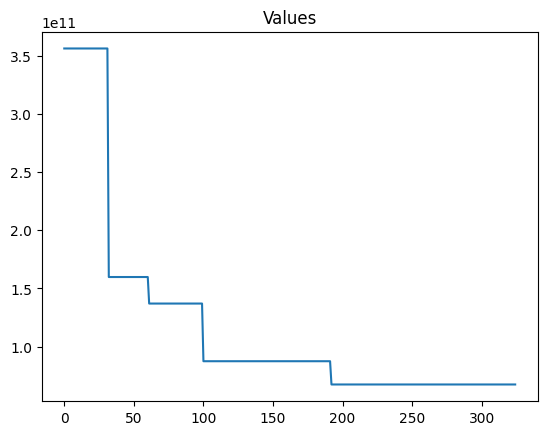

In [9]:
plt.plot(history_book['values'][10:])
plt.title("Values")